# lets do some processing of the drifter data

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# dr = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/global_drifter/drifter_6hour_qc_ba8d_b27a_b7f1_U1710541881878.nc')
dr = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/global_drifter/drifter_6hour_qc_c6f4_ceb8_888b_U1710796436313.nc')

In [5]:
dr

<xarray.Dataset>
Dimensions:            (row: 3498321)
Dimensions without coordinates: row
Data variables:
    ID                 (row) object ...
    WMO                (row) float64 ...
    expno              (row) float64 ...
    time               (row) datetime64[ns] ...
    latitude           (row) float64 ...
    longitude          (row) float64 ...
    lon360             (row) float64 ...
    err_lat            (row) float64 ...
    err_lon            (row) float64 ...
    typebuoy           (row) object ...
    start_date         (row) datetime64[ns] ...
    start_lat          (row) float64 ...
    start_lon          (row) float32 ...
    end_date           (row) datetime64[ns] ...
    end_lat            (row) float64 ...
    end_lon            (row) float64 ...
    FloatDiameter      (row) object ...
    DrogueType         (row) object ...
    DrogueLength       (row) object ...
    DrogueBallast      (row) object ...
    DragAreaRatio      (row) object ...
    DrogueCenterDepth  (row) object ...
Attributes:
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    Conventions:                CF-1.6, ACDD-1.3, COARDS
    creator_email:              aoml.dftr@noaa.gov
    creator_name:               AOML drifter DAC
    creator_type:               institution
    creator_url:                https://www.aoml.noaa.gov/phod/gdp
    CurrentProgram:             9325
    date_created:               2023-12-15T12:18:30Z
    date_issued:                2023-12-15T12:18:30Z
    date_modified:              2023-12-15T12:18:30Z
    doi:                        10.25921/7ntx-z961
    Easternmost_Easting:        -100.0
    featureType:                Trajectory
    geospatial_bounds:          polygon (  180.000  13.471,  136.985  13.471,...
    geospatial_lat_max:         89.831
    geospatial_lat_min:         0.0
    geospatial_lat_resolution:  tbd
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         -100.0
    geospatial_lon_min:         -179.999
    geospatial_lon_resolution:  tbd
    geospatial_lon_units:       degrees_east
    history:                    From buoydata_15001_sep23.dat with metadata f...
    id:                         Global Drifter Program ID 107606
    infoUrl:                    https://www.aoml.noaa.gov/phod/dac/dirall.html
    institution:                NOAA Atlantic Oceanographic and Meteorologica...
    keywords:                   aground, alive, atlantic, attached, bad, batt...
    keywords_vocabulary:        GCMD Science Keywords
    license:                    Creative Commons Attribution 4.0 (https://cre...
    ManufactureSensorType:      SVP3
    ManufactureVoltage:         SVP3 volts
    metadata_link:              https://www.aoml.noaa.gov/phod/dac/dirall.html
    Northernmost_Northing:      89.831
    processing_level:           Level 2 QC by AOML drifter DAC
    publisher_email:            aoml.dftr@noaa.gov
    publisher_name:             AOML Drifter DAC
    publisher_type:             institution
    publisher_url:              https://www.aoml.noaa.gov/phod/gdp
    source:                     source description
    sourceUrl:                  (local files)
    Southernmost_Northing:      0.0
    standard_name_vocabulary:   CF Standard Name Table v30
    subsetVariables:            ID,WMO, expno,typedeath, typebuoy,SensorUpgra...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        1979-07-24T18:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -179.999
    wmo_platform_code:          5200607

In [6]:
# its 2D so lets convert the parts we need rn to a dataframe
df = dr.drop(['WMO','expno','lon360','err_lat','err_lon','typebuoy',
         'start_date','start_lat','start_lon','end_date','end_lat','end_lon',
         'FloatDiameter','DrogueType','DrogueBallast','DragAreaRatio','DrogueCenterDepth']).to_dataframe()

In [7]:
ids = set(df.ID) #unique drifter ids
ids = np.array(list(ids))
len(ids)

2638

In [13]:
# drop em if they don't get close to the North Pacific Current split range (45-50 N) that we saw from Dr. Yoshida's work
keep = np.array([id for id in ids if np.max(df.latitude[df.ID==id]) >= 45 and np.min(df.latitude[df.ID==id]) <= 50 and np.max(df.longitude[df.ID==id]) >= -135])

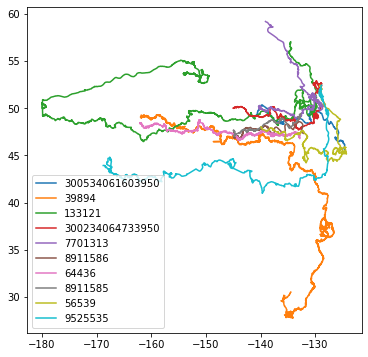

In [14]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
for k in keep[20:30]:
    ax.plot(df.longitude[df.ID==k],df.latitude[df.ID==k],label=str(k))
ax.legend()

# better!

In [16]:
# oof, not many plot this split
len(keep)

283

In [17]:
# lets save it as a new dataframe anyhow
df_filtered = df[df['ID'].isin(keep)]

In [20]:
# check based on number of unique drifters that that was done correctly (should be same length as keep)
len(set(df_filtered.ID))

283

In [21]:
## woo and save!
df_filtered.to_csv('filteredDrifters.csv')